<a href="https://colab.research.google.com/github/conqryash007/Image-Cartoonizer/blob/main/Image_Cartoonizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

In [2]:
def read_file(filename):
  img = cv2.imread(filename)
  cv2_imshow(img)
  return img

##Upload Image File

Saving 22pushpa1.jpg to 22pushpa1.jpg


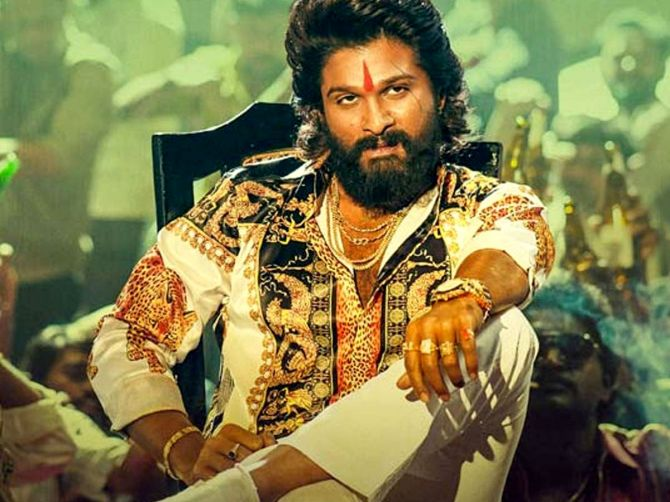

In [3]:
uploaded = files.upload()

filename = next(iter(uploaded))
img = read_file(filename)

#EDGE DETECTION

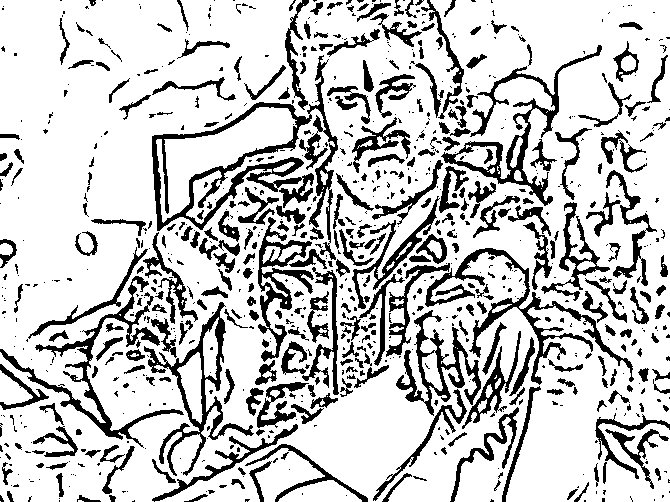

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_1 = cv2.medianBlur(gray, 5)
edges = cv2.adaptiveThreshold(gray_1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 5)
cv2_imshow(edges)

#IMAGE CARTOONIZATION USING QUANTIZATION

##QUANTIZATION OF IMAGE

In [5]:
def color_quantization(img, k):
# Defining input data for clustering
  data = np.float32(img).reshape((-1, 3))

# Defining criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
  
# Applying cv2.kmeans function
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

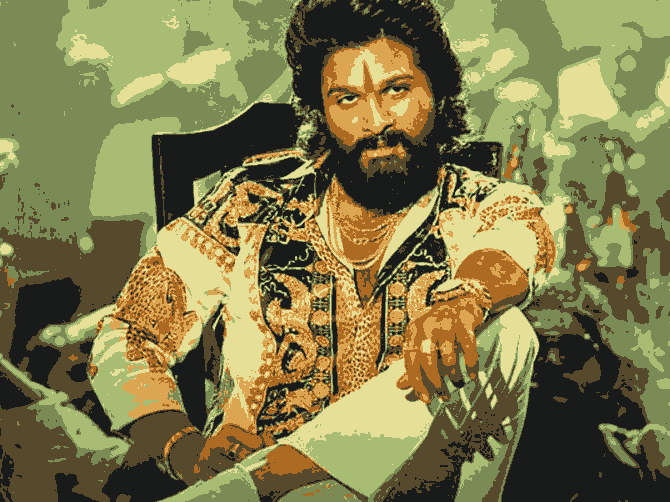

In [6]:
img_1 = color_quantization(img, 7)
cv2_imshow(img_1)

##BLURRING OF QUANTIZED IMAGE

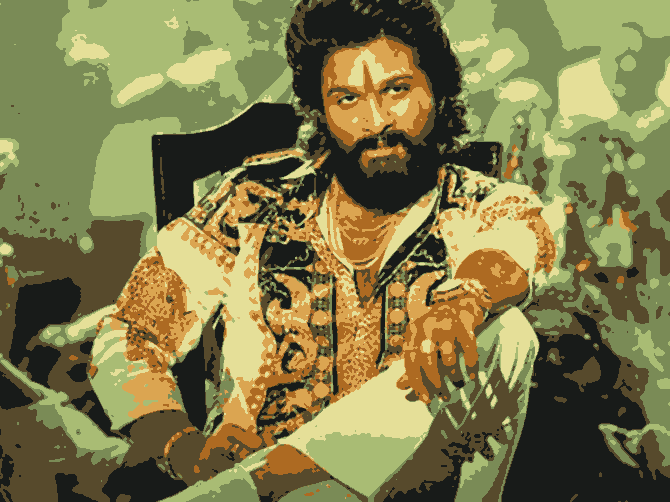

In [7]:
blurred = cv2.medianBlur(img_1, 3)
cv2_imshow(blurred)

##COMBINE THE EDGES WITH THE QUANTIZED IMAGE

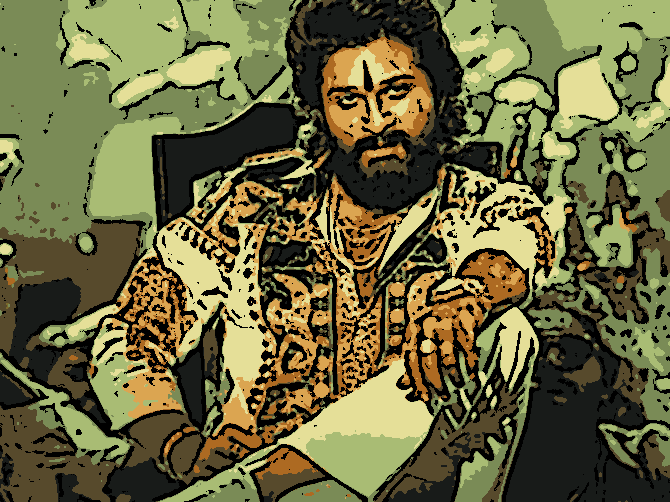

In [8]:
cartoon_1 = cv2.bitwise_and(blurred, blurred, mask=edges)
cv2_imshow(cartoon_1)

#IMAGE CARTOONIZATION USING BILATERAL FILTER

##APPLYING BILATERAL FILTER TO IMAGE

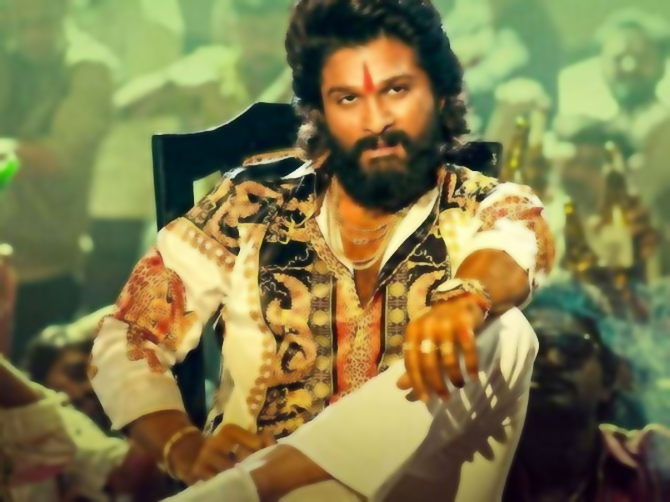

In [9]:
color = cv2.bilateralFilter(img, d=9, sigmaColor=200,sigmaSpace=200)
cv2_imshow(color)

##COMBINE THE EDGES WITH THE BILATERAL FILTER IMAGE

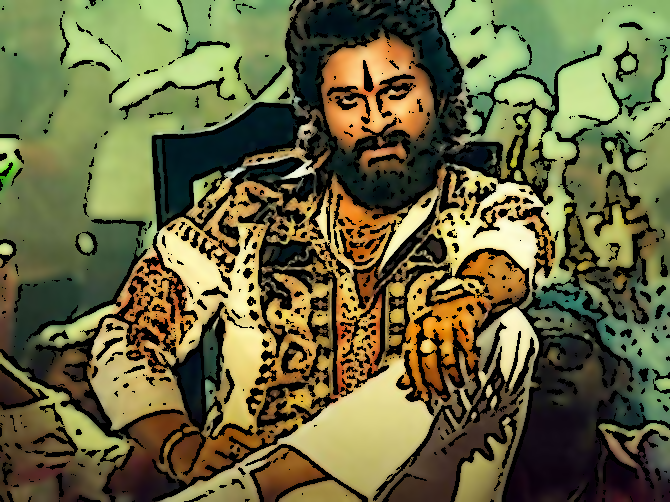

In [10]:
cartoon = cv2.bitwise_and(color, color, mask=edges)
cv2_imshow(cartoon)